<a href="https://colab.research.google.com/github/ohsang14/school_python/blob/main/0604_Apriori%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# 장바구니 데이터
tran = [['A', 'B', 'C', 'D', 'E'],
        ['B', 'C'],
        ['A', 'B', 'F'],
        ['A', 'B', 'G'],
        ['A', 'F', 'H']]


In [4]:
te = TransactionEncoder()
tran_ar = te.fit(tran).transform(tran)
print(tran_ar)

print(te.columns_)

[[ True  True  True  True  True False False False]
 [False  True  True False False False False False]
 [ True  True False False False  True False False]
 [ True  True False False False False  True False]
 [ True False False False False  True False  True]]
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


In [5]:
df = pd.DataFrame(tran_ar, columns=te.columns_)
print(df)

       A      B      C      D      E      F      G      H
0   True   True   True   True   True  False  False  False
1  False   True   True  False  False  False  False  False
2   True   True  False  False  False   True  False  False
3   True   True  False  False  False  False   True  False
4   True  False  False  False  False   True  False   True


In [7]:
freq = df.sum().to_frame('Frequency')

freq_sort = freq.sort_values('Frequency', ascending=False)
print(freq_sort)

   Frequency
A          4
B          4
C          2
F          2
D          1
E          1
G          1
H          1


In [8]:
freq_sort['Support'] = freq_sort['Frequency'] / len(tran)
print(freq_sort)

   Frequency  Support
A          4      0.8
B          4      0.8
C          2      0.4
F          2      0.4
D          1      0.2
E          1      0.2
G          1      0.2
H          1      0.2


<Axes: title={'center': 'Frequent Items'}>

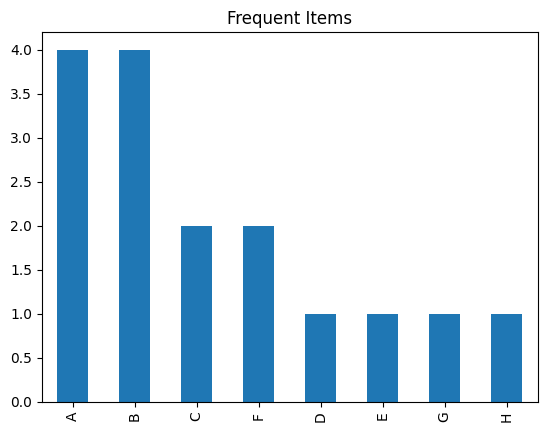

In [9]:
freq_sort['Frequency'].plot(kind='bar',title='Frequent Items')

<Axes: >

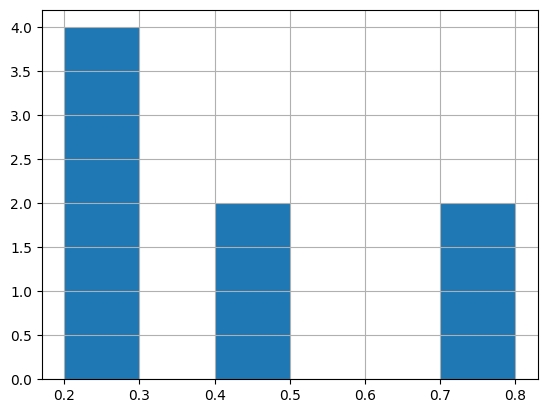

In [10]:
freq_sort['Support'].hist(bins=6)

In [11]:
freq_items = apriori(df,min_support = 0.4, use_colnames=True)
print(freq_items)

   support itemsets
0      0.8      (A)
1      0.8      (B)
2      0.4      (C)
3      0.4      (F)
4      0.6   (A, B)
5      0.4   (F, A)
6      0.4   (C, B)


In [12]:
rules = association_rules(freq_items,
                          metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(A),(B),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.250000,0.6,-0.25,0.75
1,(B),(A),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.250000,0.6,-0.25,0.75
2,(F),(A),0.4,0.8,0.4,1.00,1.2500,1.0,0.08,inf,0.333333,0.5,1.00,0.75
3,(C),(B),0.4,0.8,0.4,1.00,1.2500,1.0,0.08,inf,0.333333,0.5,1.00,0.75


In [13]:
rules = rules[(rules['lift'] > 1)]

rules.sort_values(by='confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(F),(A),0.4,0.8,0.4,1.0,1.25,1.0,0.08,inf,0.333333,0.5,1.0,0.75
3,(C),(B),0.4,0.8,0.4,1.0,1.25,1.0,0.08,inf,0.333333,0.5,1.0,0.75


In [14]:
rules[rules.antecedents.apply(lambda x: 'F' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(F),(A),0.4,0.8,0.4,1.0,1.25,1.0,0.08,inf,0.333333,0.5,1.0,0.75


In [15]:
rules[rules.consequents.apply(lambda x: 'B' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(C),(B),0.4,0.8,0.4,1.0,1.25,1.0,0.08,inf,0.333333,0.5,1.0,0.75
